### Import Library yang diperlukan

In [1]:
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt

%matplotlib inline

### Import Dataset dan Preview dataset

In [2]:
df = pd.read_csv('Dataset/london_crime_by_lsoa.csv')
df.head(15)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


# Line dan Scatter Plot

#### Plot 1
Plot pertama adalah untuk melihat peningkatan jumlah kejahatan pada kota london setiap tahunnya

Dua Sel kode berikut berguna untuk menyaring data yang memiliki nilai value yang lebih besar atau sama dengan 1, hal ini bertujuan untuk mendapatkan data dimana kriminal sedang terjadi ( 0 : tidak terjadi | >= 1 : terjadi )

In [3]:
filtering1 = (df['value'] >= 1)

data_plot1 = df[filtering1]

In [4]:
data_plot1

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
24,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
...,...,...,...,...,...,...,...
13490581,E01000789,Bromley,Violence Against the Person,Harassment,3,2009,12
13490584,E01003301,Lewisham,Violence Against the Person,Assault with Injury,1,2015,10
13490590,E01001679,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4
13490592,E01033327,Lewisham,Violence Against the Person,Common Assault,2,2013,7


--------------------------------------------------------------------------------------------------------

Sel kode berikut berguna untuk melihat angka kejahatan setiap tahunnya dari tahun 2008 sampai 2016 dalam bentuk tabel

In [5]:
plot1 = data_plot1.groupby("year").size().reset_index(name="count")

In [6]:
plot1

,year,count
0,2008,391242
1,2009,383008
2,2010,379349
3,2011,378814
4,2012,377721
5,2013,364680
6,2014,370384
7,2015,381859
8,2016,392042


--------------------------------------------------------------------------------------------------------

Sel kode berikut berguna untuk distribusi dari hasil tabel tersebut, dalam bentuk scatterplot sekaligus dihubungkan dengan garis

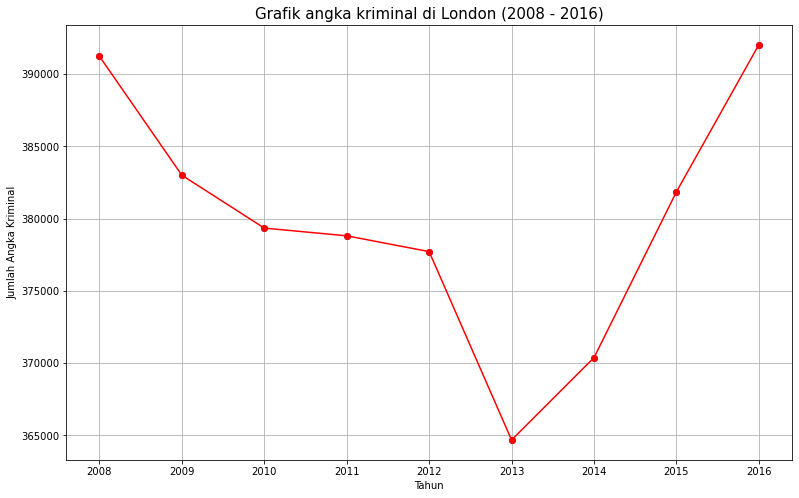

In [7]:
plt.figure(figsize = (13, 8))
plt.plot(plot1['year'], plot1['count'], color='red', marker='o')
plt.scatter(plot1['year'], plot1['count'])
plt.title("Grafik angka kriminal di London (2008 - 2016)", fontsize = 15)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Angka Kriminal')
plt.grid(True)
plt.show()

##### Insigh
Dari plot diatas bisa dilihat, dari tahun 2008 - 2013 angka kriminal mengalami penurunan, tetapi setelah tahun 2013 angka kriminal di london mengalami kenaikan sampai tahun 2016

==================================================================================================================

#### Plot 2
Plot kedua adalah untuk melihat peningkatan jumlah kejahatan pada empat wilayah dengan jumlah angka kriminal tertinggi di kota london setiap tahunnya (2008 - 2016)

Sel kode berikut berguna untuk melihat empat borough yang memiliki angka kriminal tertinggi 

In [8]:
data_plot1_x = data_plot1.groupby("borough").size().reset_index(name="count")
data_plot1_x = data_plot1_x.sort_values(by = ['count'], ascending=False)
data_plot1_x = data_plot1_x.reset_index()
data_plot1_x = data_plot1_x.drop(columns=['index'])

In [9]:
data_plot1_x.head(4)

,borough,count
0,Lambeth,152784
1,Croydon,147203
2,Southwark,144362
3,Ealing,140006


--------------------------------------------------------------------------------------------------------

Sel kode berikut berguna untuk membuat seleksi terhadap empat borough tertinggi sekaligus menghitung angka kriminal pada borough tersebut setiap tahunnya

In [10]:
df_plot_line2 = df.drop(columns=['lsoa_code', 'major_category', 'minor_category', 'month'])

data_borough1 = df_plot_line2[(df_plot_line2['value'] >= 1) & (df_plot_line2['borough'] == 'Croydon' )].groupby("year").size().reset_index(name="count")
data_borough2 = df_plot_line2[(df_plot_line2['value'] >= 1) & (df_plot_line2['borough'] == 'Lambeth' )].groupby("year").size().reset_index(name="count")
data_borough3 = df_plot_line2[(df_plot_line2['value'] >= 1) & (df_plot_line2['borough'] == 'Ealing' )].groupby("year").size().reset_index(name="count")
data_borough4 = df_plot_line2[(df_plot_line2['value'] >= 1) & (df_plot_line2['borough'] == 'Southwark' )].groupby("year").size().reset_index(name="count")

--------------------------------------------------------------------------------------------------------

Sel kode berikut berguna untuk membuat plotting terhadap ketentuan sebelumnya yaitu melihat distribusi kenaikan dan penurunan angka kriminal di empat borough dengan angka kriminal tertinggi

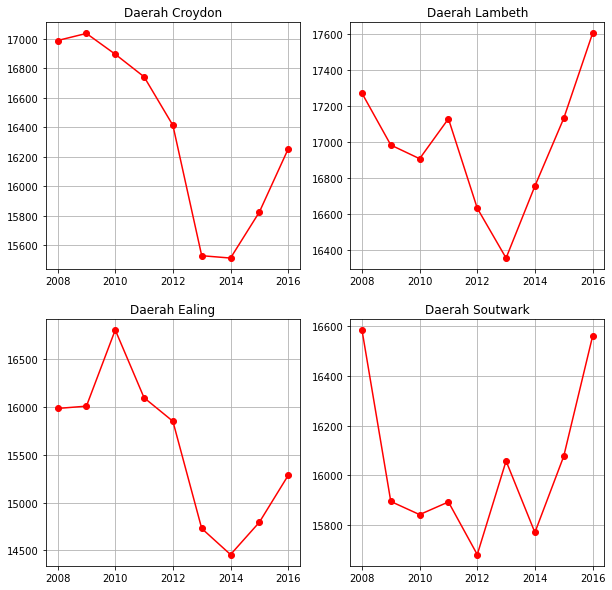

In [12]:
plt.figure(figsize = (10, 10))

# Plot untuk daerah Croydon
plt.subplot(2,2,1)
plt.plot(data_borough1['year'], data_borough1['count'], color='red', marker='o')
plt.title("Daerah Croydon")
plt.grid(True)
  
# Plot untuk daerah Lambeth
plt.subplot(2,2,2)
plt.plot(data_borough2['year'], data_borough2['count'], color='red', marker='o')
plt.title("Daerah Lambeth")
plt.grid(True)
  
# Plot untuk daerah Ealing
plt.subplot(2,2,3)
plt.plot(data_borough3['year'], data_borough3['count'], color='red', marker='o')
plt.title("Daerah Ealing")
plt.grid(True)
  
# Plot untuk daerah Southwark
plt.subplot(2,2,4)
plt.plot(data_borough4['year'], data_borough4['count'], color='red', marker='o')
plt.title("Daerah Soutwark")
plt.grid(True)

plt.show()

##### Insigh
Dari plot diatas bisa dilihat, dari empat borough dengan angka kriminal tertinggi memiliki kesamaan dimana pada tahun 2014 angka kriminal akan mengalami kenaikan yang ditahun-tahun sebelumnya mengalami penurunan

==================================================================================================================

# Area Plot

Area Plot bertujuan distribusi empat borough dengan angka kriminal tertinggi

Sel berikut berguna untuk mendeklarasikan variabel yang diperlukan

In [13]:
borough1_year = []
borough2_year = []
borough3_year = []
borough4_year = []

borof = [borough1_year, borough2_year, borough3_year, borough4_year]

year = [2008, 2009, 2011, 2012, 2013, 2014, 2015, 2016]
top_borough = ['Lambeth', 'Croydon', 'Southwark', 'Ealing']


--------------------------------------------------------------------------------------------------------

Sel berikut berguna untuk membuat dataset baru berdasarkan dataset awal tetapi dengan menghilangkan beberapa kolom yang tidak diperlukan

In [14]:
df_area = df.drop(columns = ['lsoa_code', 'major_category', 'minor_category', 'month'])
#condition = df_area[(df_area['value'] >= 1) & (df_area['borough'] == 'Lambeth') & (df_area['year'] == year[0])]

--------------------------------------------------------------------------------------------------------

Sel berikut merupakan perulangan for yang berguna untuk mengisi variabel yang telah dideklarasikan sebelumnya

In [15]:
for i in range(len(top_borough)) :
    borough = top_borough[i]
    lis = borof[i]
    for j in range(len(year)) :
        condition = df_area[(df_area['value'] >= 1) & (df_area['borough'] == borough) & (df_area['year'] == year[j])]
        lis.append(len(condition))

--------------------------------------------------------------------------------------------------------

Sel berikut berguna untuk membuat dataframe baru dimana dataframe ini berisi empat borough dengan angka kriminal tertinggi beserta angka kriminalnya dari tahun 2008 sampai 2016

In [16]:
area_dict = {top_borough[0] : borof[0],
            top_borough[1] : borof[1],
            top_borough[2] : borof[2],
            top_borough[3] : borof[3]
            }

area_df = pd.DataFrame(data = area_dict, index=year)

In [17]:
area_df

,Lambeth,Croydon,Southwark,Ealing
2008,17273,16989,16586,15984
2009,16985,17037,15895,16008
2011,17131,16743,15893,16096
2012,16634,16414,15681,15850
2013,16357,15530,16058,14729
2014,16757,15514,15770,14456
2015,17133,15826,16077,14794
2016,17605,16254,16560,15284


--------------------------------------------------------------------------------------------------------

Sel berikut berguna untuk membuat plotting distribusi menggunakan area plot

<function matplotlib.pyplot.show(close=None, block=None)>

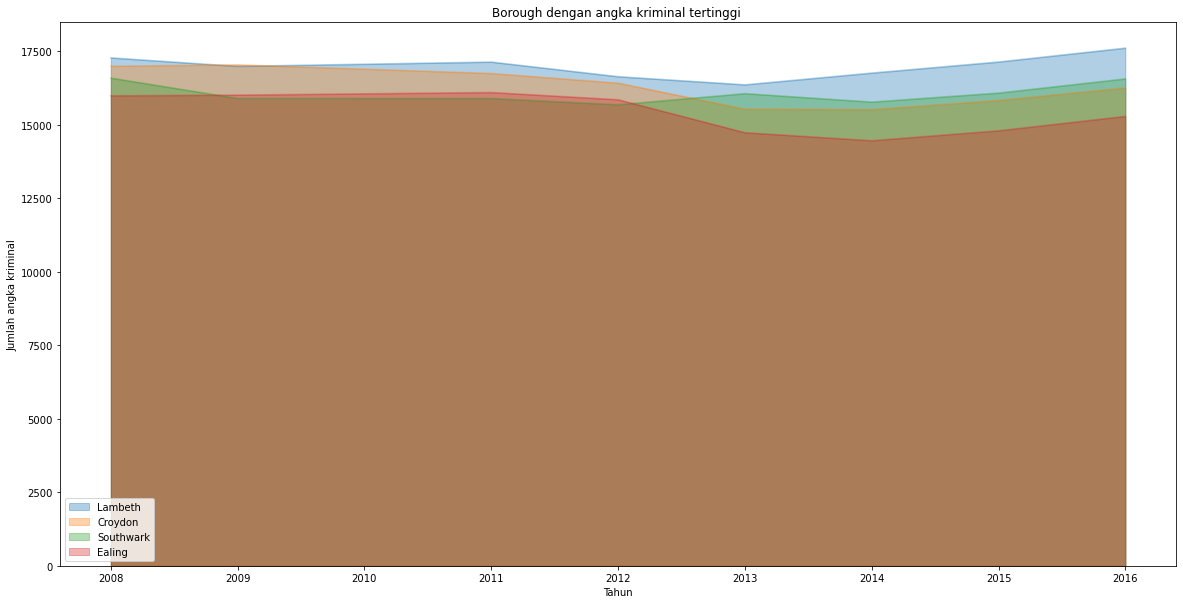

In [18]:
area_df.plot(kind = 'area',
            alpha = 0.35,
            stacked = False,
            figsize = (20, 10),
            )

plt.title("Borough dengan angka kriminal tertinggi ")
plt.xlabel("Tahun")
plt.ylabel("Jumlah angka kriminal")

plt.show

##### Insigh
Dari plot diatas bisa dilihat area plot, distribusi kenaikan dan penurunan angka kejahatan setiap tahunnya pada 4 borough dengan angka kriminal tertinggi

==================================================================================================================

# Histogram

#### Plot 1
Plot 1 berguna untuk melihat distribusi angka kriminal pada 5 wilayah dengan angka kriminal tertinggi

In [19]:
df_hist = area_df

<AxesSubplot:ylabel='Frequency'>

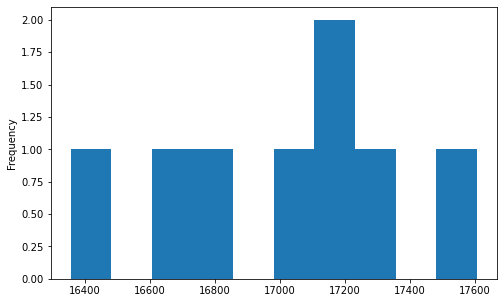

In [20]:
df_hist['Lambeth'].plot(kind='hist', figsize = (8, 5))

==================================================================================================================

# Bar Chart

#### Plot 1
Plot 1 berguna untuk melihat distribusi jenis kriminal utama yang terjadi di london

In [21]:
df_bar = df.drop(columns = ['lsoa_code', 'minor_category', 'month', 'borough', 'year'])
df_bar = df_bar[df_bar['value'] >= 1]
df_bar = df_bar.groupby("major_category").size().reset_index(name='counts')
df_bar = df_bar.sort_values(by = ['counts'], ascending=False)

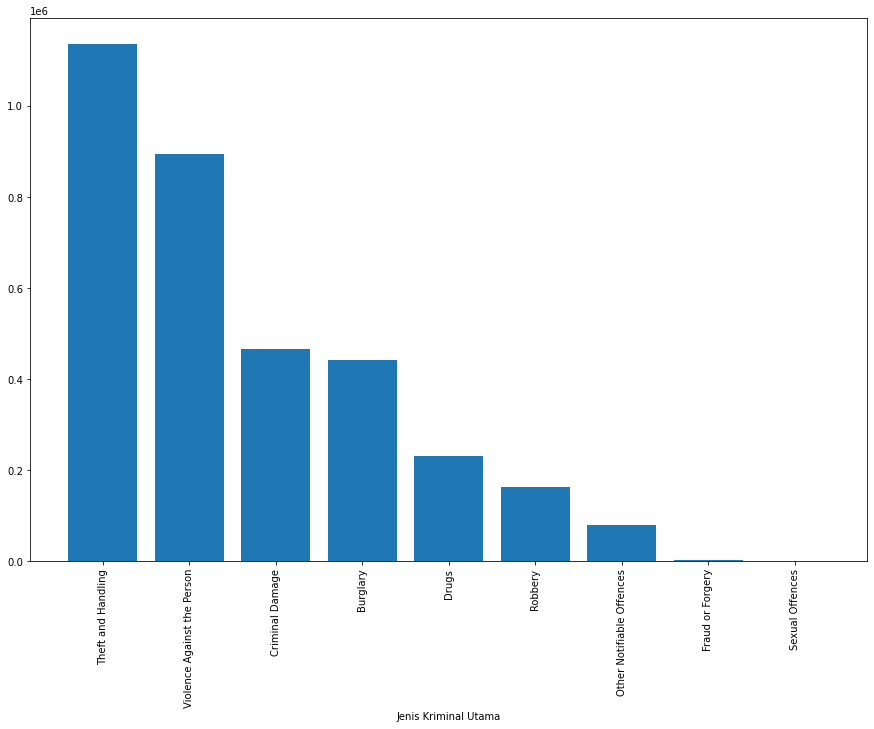

In [22]:
plt.figure(figsize = (15, 10))
plt.bar(x = df_bar['major_category'], height=df_bar['counts'])
plt.xlabel("Jenis Kriminal Utama")
plt.xticks(rotation = 90)
plt.show()

##### Insigh
Dari plot diatas bisa dilihat, jenis kriminal yang paling sering terjadi dari rentang tahun 2008 - 2016 adalah Kasus Pencurian (Theft and Handling) lalu diikuti dengan Kekerasan terhadap Seseorang(Violence Against the Person) dan Kerusakan vandalisme (Criminal Damage)

==================================================================================================================

# Pie Chart

Sel dibawah berguna untuk membuat dataframe baru yang dari distribusi sebelumnya lalu menggunakan data tersebut untuk membuat pie chart

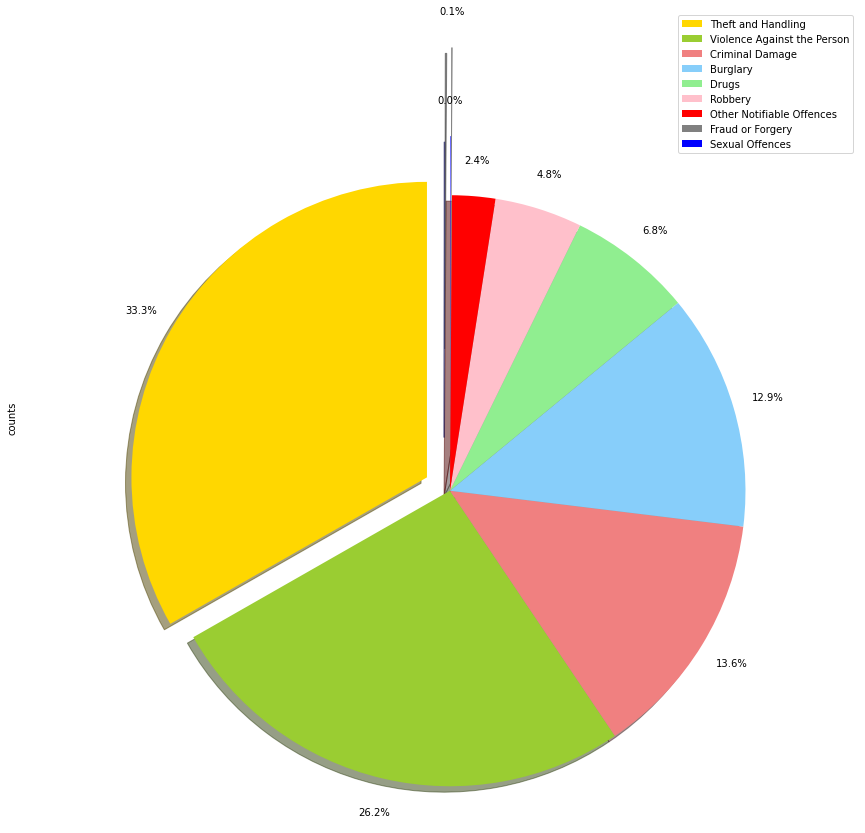

In [23]:
df_pie = df_bar
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'red', 'grey', 'blue']
explode_list = [0.09, 0, 0, 0, 0, 0, 0, 0.5, 0.2]

df_pie['counts'].plot(kind = 'pie',
                      figsize = (15,15),
                      autopct = '%1.1f%%',
                      startangle = 90,
                      shadow = True,
                      labels = None,
                      pctdistance = 1.12,
                      colors = colors_list,
                      explode = explode_list
                     )

plt.axis('equal')
plt.legend(labels=df_pie['major_category'], loc='upper right')
plt.show()

##### Insigh
Dari plot diatas bisa dilihat dengan bentuk distribusi yang lebih baik, jenis kriminal yang paling sering terjadi dari rentang tahun 2008 - 2016 adalah Kasus Pencurian (Theft and Handling) lalu diikuti dengan Kekerasan terhadap Seseorang(Violence Against the Person) dan Kerusakan vandalisme (Criminal Damage)

Sedangkan Fraud or Forgery dan Sexual Offences hanya berjumlah 0.1% dan dibawah 0.1%

==================================================================================================================

# Box Plot

Sel dibawah berguna untuk membuat dataframe baru yang digunakan untuk membuat boxplot nantinya

In [24]:
box_df = area_df
box_df

,Lambeth,Croydon,Southwark,Ealing
2008,17273,16989,16586,15984
2009,16985,17037,15895,16008
2011,17131,16743,15893,16096
2012,16634,16414,15681,15850
2013,16357,15530,16058,14729
2014,16757,15514,15770,14456
2015,17133,15826,16077,14794
2016,17605,16254,16560,15284


--------------------------------------------------------------------------------------------------------

Sel dibawah berguna untuk membuat boxplot dari dataframe yang telah dibuat sebelumnya

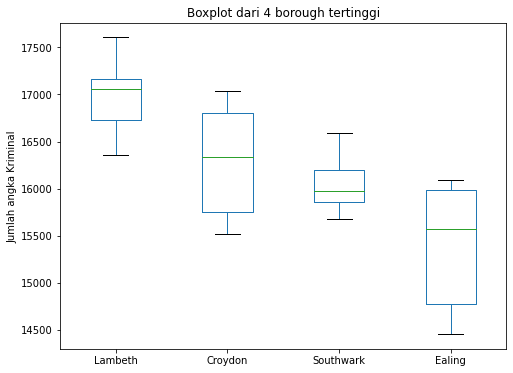

In [25]:
box_df.plot(kind='box', figsize = (8, 6))

plt.title('Boxplot dari 4 borough tertinggi')
plt.ylabel('Jumlah angka Kriminal')

plt.show()

#### Data yang didapat dari boxplot 

Lambeth : 
- min = ~17600
- max = ~16300
- median = ~17000
- Q1 = ~16750
- Q3 = ~17200

Croydon :
- min = ~15500
- max = ~17000
- median = ~16250
- Q1 = ~15750
- Q3 = ~16250

Southwark :
- min = ~15600
- max = ~16600
- median = ~16000
- Q1 = ~15850
- Q3 = ~16200

Ealing :
- min = ~14500
- max = ~16100
- median = ~15550
- Q1 = ~14800
- Q3 = ~16000

==================================================================================================================

# Folium Map

Berikut bentuk peta dari empat borough dengan tingkat kriminal tertinggi

Sel dibawah berguna untuk mengimport library folium dan mendeklarasikan latitude dan longitude dari empat borough dengan angka kriminal tertinggi di London

In [26]:
import folium

Lambeth = [51.503324, -0.119543]
Croydon = [51.376165, -0.098234]
Southwark = [51.4500, -0.0833]
Ealing = [51.5000, -0.3333]

--------------------------------------------------------------------------------------------------------

Sel dibawah berguna untuk melihat peta daerah Lambeth

In [26]:
Lambeth_map = folium.Map(location = [Lambeth[0], Lambeth[1]], zoom_start = 16)
Lambeth_map

--------------------------------------------------------------------------------------------------------

Sel dibawah berguna untuk melihat peta daerah Croydon

In [27]:
Croydon_map = folium.Map(location = [Croydon[0], Croydon[1]], zoom_start = 16)
Croydon_map

--------------------------------------------------------------------------------------------------------

Sel dibawah berguna untuk melihat peta daerah Southwark

In [28]:
Southwark_map = folium.Map(location = [Southwark[0], Southwark[1]], zoom_start = 16)
Southwark_map

--------------------------------------------------------------------------------------------------------

Sel dibawah berguna untuk melihat peta daerah Ealing

In [29]:
Ealing_map = folium.Map(location = [Ealing[0], Ealing[1]], zoom_start = 16)
Ealing_map

==================================================================================================================

# Kesimpulan :

Terdapat beberapa pertanyaan pada tugas ini :
- Bagaimana kenaikan angka kriminal di kota london dari tahun 2008 - 2016
- Dimana wilayah London dengan angka kriminal tertinggi
- Apa jenis kriminal yang paling sering terjadi di kota London

Jawab :
1. Angka Kriminal di kota London mengalami penurunan pada tahun 2008 - 2013, setelah itu yaitu tahun 2013 - 2016 angka kriminal menggalami kenaikan
2. Empat wilayah Kota London yang memiliki angka kriminal tertinggi adalah Lambeth, Croydon, Southwark dan Ealing. Pada wilayah tersebut rata-rata pada tahun 2008 - 2013 angka kriminal mengalami penurunan, dan pada tahun-tahun selanjutnya mengalami kenaikan
3. Jenis Kriminal yang paling sering terjadi adalah kasus pencurian dan perampokan lalu diikuti dengan Kekerasan terhadap orang dan kerusakan vandalisme